In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Heart data.csv to Heart data.csv


In [3]:
import pandas as pd
heart = pd.read_csv('Heart data.csv')
heart.head()
heart

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
0                   63    1           1           145.0         233.0   
1                   37    1           3           130.0         250.0   
2                   41    0           2           130.0         204.0   
3                   56    1           2           120.0         236.0   
4                   57    0           4           120.0         354.0   
..                 ...  ...         ...             ...           ...   
592                 52    1           4           140.0         266.0   
593                 43    1           4           140.0         288.0   
594                 41    1           4           120.0         336.0   
595                 44    1           4           135.0         491.0   
596                 49    1           4           150.0         222.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
0            1.0                    2.0       150.0               0.0   
1            0.0                    0.0       187.0               0.0   
2            0.0                    2.0       172.0               0.0   
3            0.0                    0.0       178.0               0.0   
4            0.0                    0.0       163.0               1.0   
..           ...                    ...         ...               ...   
592          0.0                    0.0       134.0               1.0   
593          0.0                    0.0       135.0               1.0   
594          0.0                    0.0       118.0               1.0   
595          0.0                    0.0       135.0               0.0   
596          0.0                    0.0       122.0               0.0   

     depression   slope   ca  thal  c  
0            2.3    3.0  0.0   6.0  0  
1            3.5    3.0  0.0   3.0  0  
2            1.4    1.0  0.0   3.0  0  
3            0.8    1.0  0.0   3.0  0  
4            0.6    1.0  0.0   3.0  0  
..           ...    ...  ...   ... ..  
592          2.0    2.0  NaN   NaN  1  
593          2.0    2.0  NaN   NaN  1  
594          3.0    2.0  NaN   NaN  1  
595          0.0    NaN  NaN   NaN  1  
596          2.0    2.0  NaN   NaN  1  

[597 rows x 14 columns]

In [6]:
#!pip install ydata-profiling

from ydata_profiling import ProfileReport

profile = ProfileReport(heart, title="Heart Data Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 38.60it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/klib/describe.py:275: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return corr.style.applymap(color_negative_red).format("{:.2f}", na_rep="-")


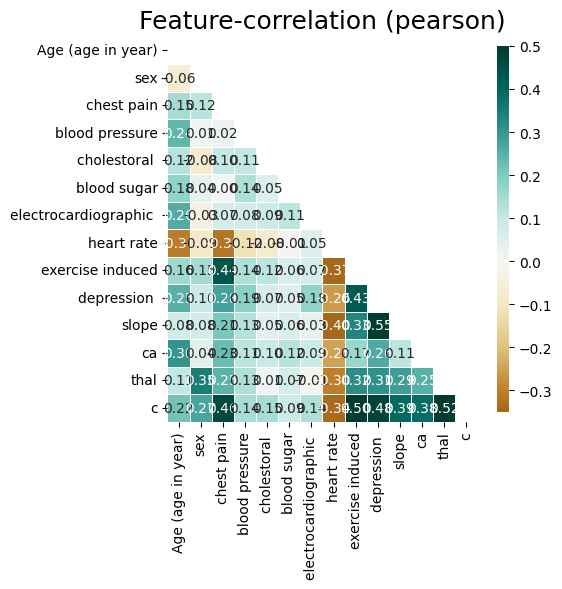

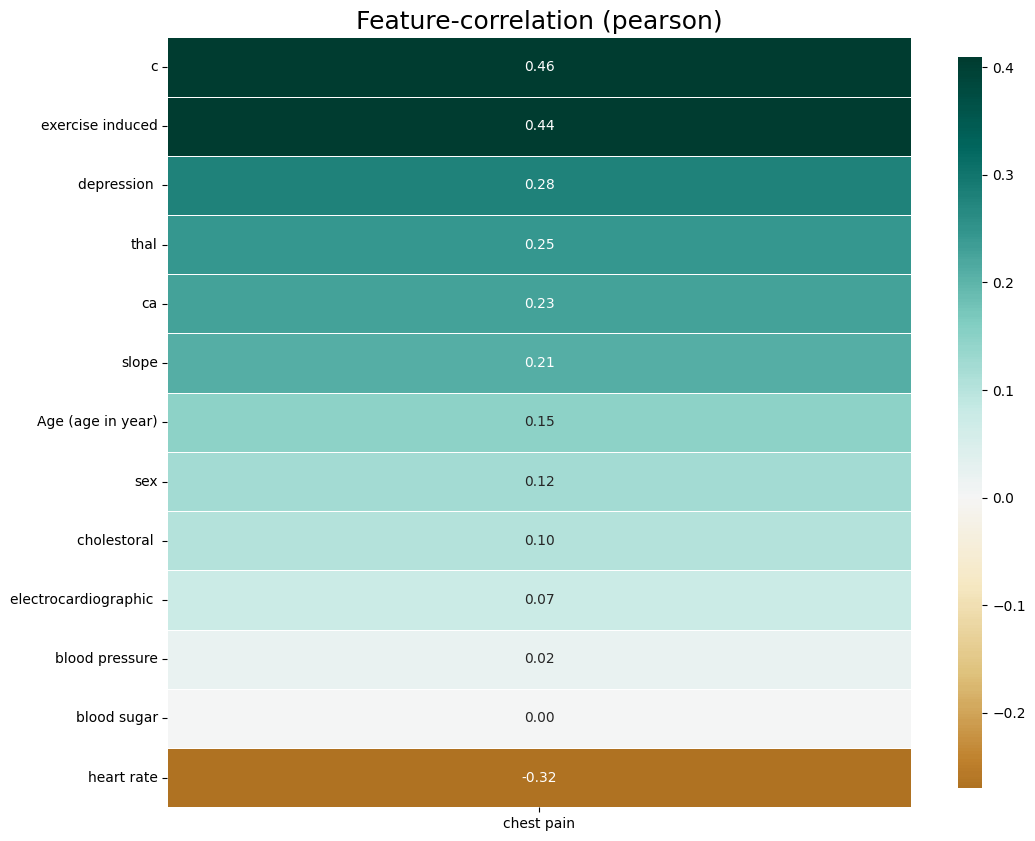

In [8]:
#!pip install klib

import klib
klib.corr_plot(heart, annot=True, figsize = (5,5))
klib.corr_plot(heart, target='chest pain')
klib.corr_mat(heart)

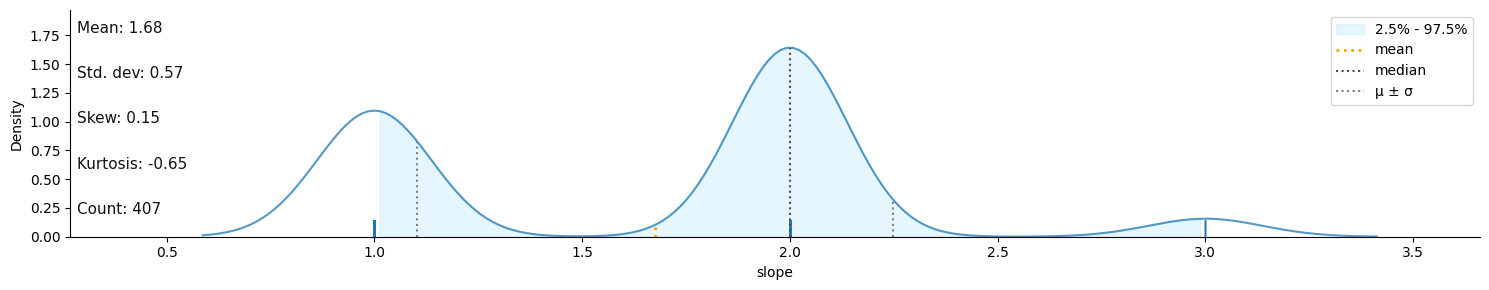

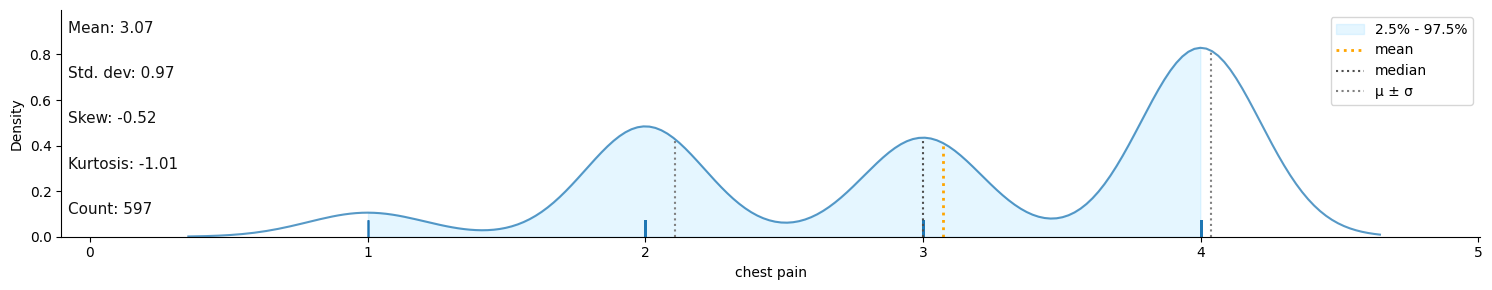

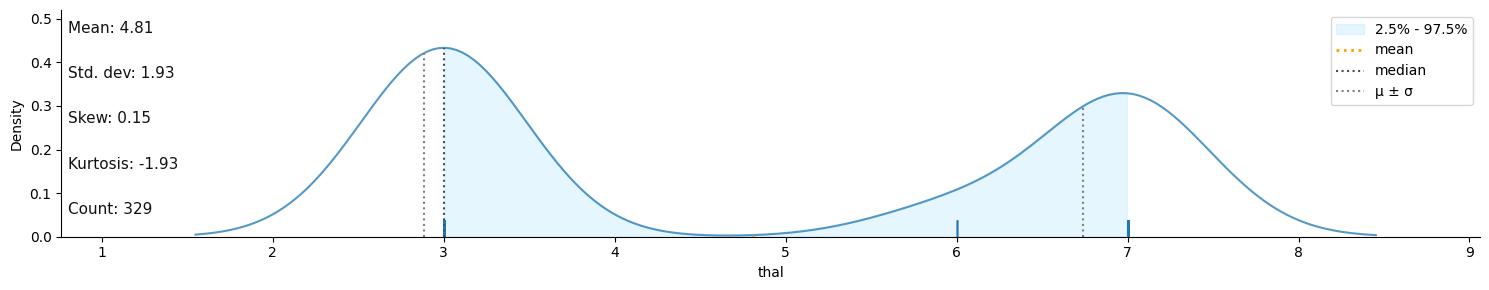

In [9]:
for col in ['slope', 'chest pain', 'thal']:
    klib.dist_plot(heart[col])

In [10]:
heart.isnull().sum()
heart.columns
numeric_cols = heart.select_dtypes(include=['number']).columns
print("Numerical columns:", numeric_cols)
categorical_features = []
for col in heart.columns:
    unique_values = heart[col].nunique()
    if unique_values <= 5:
        categorical_features.append(col)
print("Categorical Features:", categorical_features)

Numerical columns: Index(['Age (age in year)', 'sex', 'chest pain', 'blood pressure',
       'cholestoral ', 'blood sugar', 'electrocardiographic ', 'heart rate',
       'exercise induced', 'depression ', 'slope', 'ca', 'thal', 'c'],
      dtype='object')
Categorical Features: ['sex', 'chest pain', 'blood sugar', 'electrocardiographic ', 'exercise induced', 'slope', 'ca', 'thal', 'c']


In [11]:
numeric_cols = ['Age (age in year)', 'blood pressure', 'cholestoral ', 'heart rate', 'depression ', 'ca']
def replace_outliers_with_nan(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[col] = df[col].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)
replace_outliers_with_nan(heart, numeric_cols)
print(heart.isnull().sum())

Age (age in year)          0
sex                        0
chest pain                 0
blood pressure            18
cholestoral               42
blood sugar                8
electrocardiographic       1
heart rate                 2
exercise induced           1
depression                11
slope                    190
ca                       315
thal                     268
c                          0
dtype: int64


In [12]:
from sklearn.impute import KNNImputer
numeric_cols = ['Age (age in year)', 'blood pressure', 'cholestoral ', 'blood sugar',
                'electrocardiographic ', 'heart rate', 'exercise induced', 'depression ',
                'slope', 'ca', 'thal']
missing_percentage = heart[numeric_cols].isnull().sum() / len(heart)
for col in numeric_cols:
    if missing_percentage[col] < 0.10:
        heart[col].fillna(heart[col].median(), inplace=True)
knn_imputer = KNNImputer(n_neighbors=3)
columns_with_missing = [col for col in numeric_cols if missing_percentage[col] >= 0.10]
if columns_with_missing:
    heart[columns_with_missing] = knn_imputer.fit_transform(heart[columns_with_missing])
print("Missing values after imputation:")
print(heart.isnull().sum())

Missing values after imputation:
Age (age in year)        0
sex                      0
chest pain               0
blood pressure           0
cholestoral              0
blood sugar              0
electrocardiographic     0
heart rate               0
exercise induced         0
depression               0
slope                    0
ca                       0
thal                     0
c                        0
dtype: int64


/tmp/ipython-input-12-2652959045.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart[col].fillna(heart[col].median(), inplace=True)


In [13]:
duplicates = heart[heart.duplicated()]
print(duplicates)
heart = heart.drop_duplicates()
print("Duplicate rows after removal:", heart.duplicated().sum())

     Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
265                 49    0           2           110.0         240.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
265          0.0                    0.0       160.0               0.0   

     depression      slope   ca     thal  c  
265          0.0  1.675676  0.5  4.81155  0  
Duplicate rows after removal: 0


In [14]:
def iqr_outliers(jj):
    q1 = jj.quantile(0.25)
    q3 = jj.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    out = [i for i in jj if i > Upper_tail or i < Lower_tail]
    print("Outliers:", out)
iqr_outliers(heart['cholestoral '])

def def_zscore(i):
    L = i.mean() - 3 * i.std()
    U = i.mean() + 3 * i.std()
    outliers = [c for c in i if c > U or c < L]
    print("zscore_Outliers:", outliers)

Outliers: [365.0, 117.0]


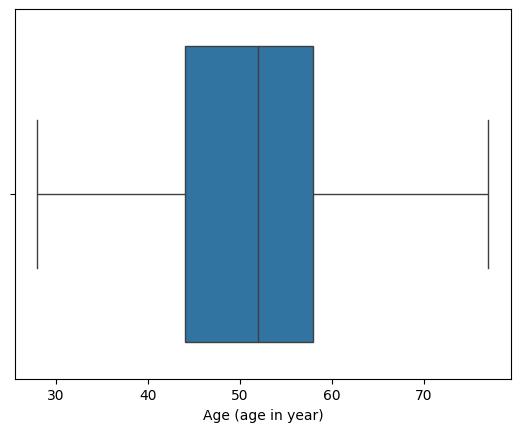

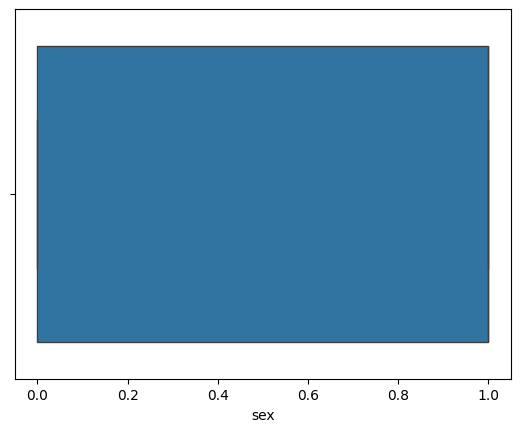

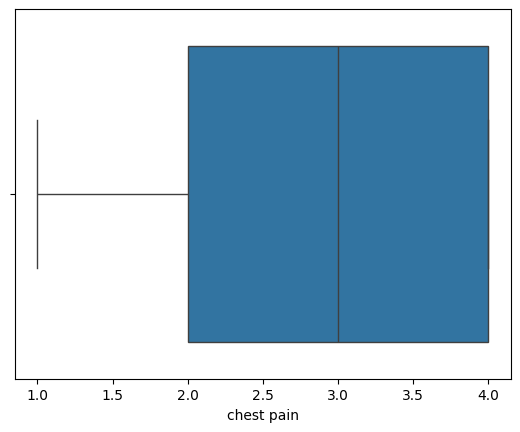

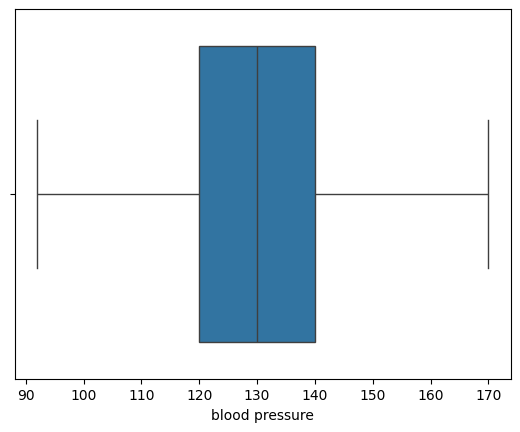

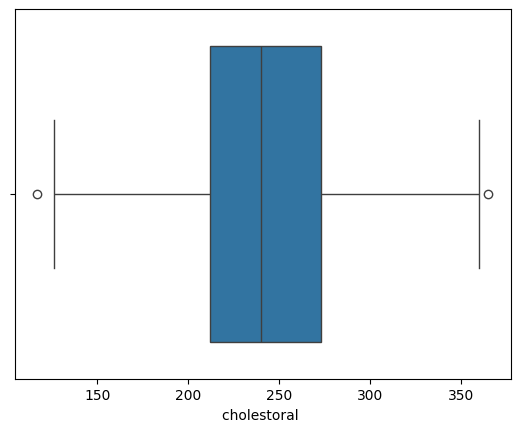

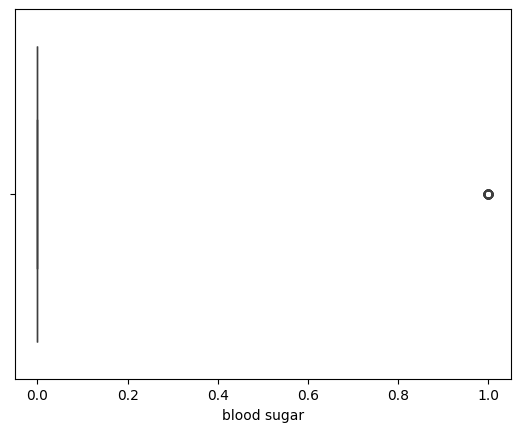

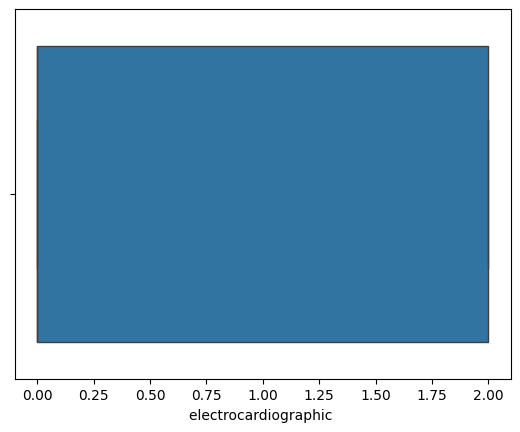

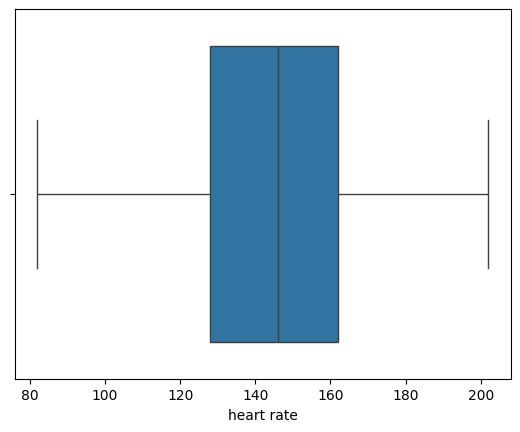

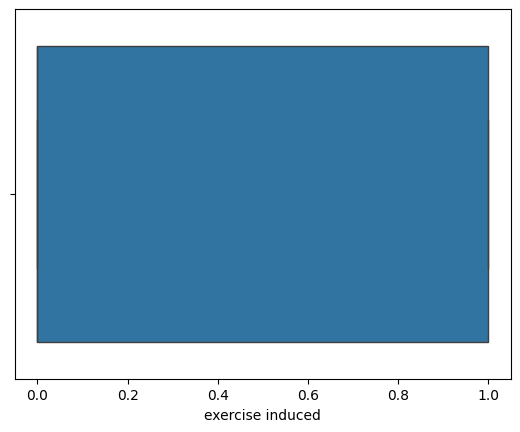

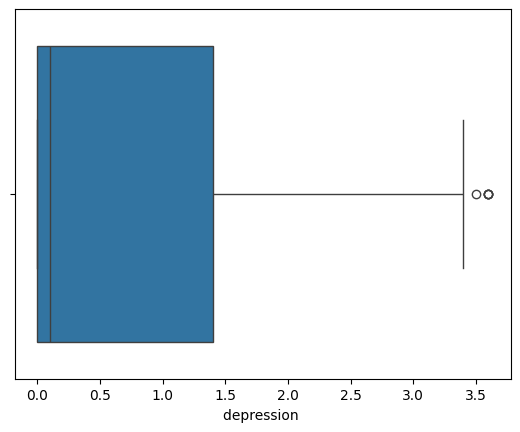

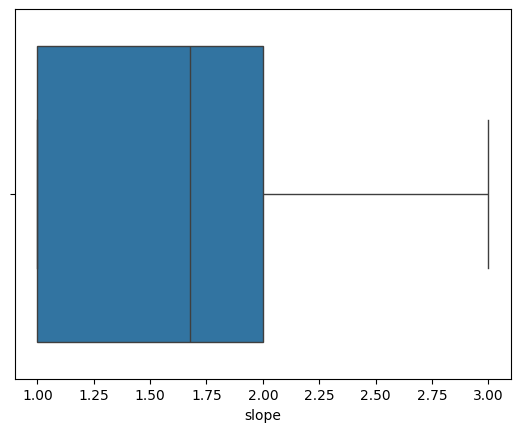

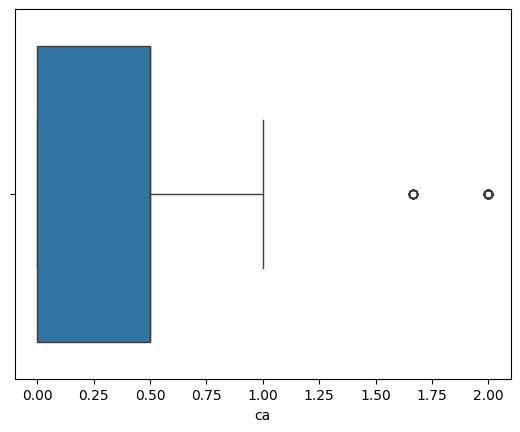

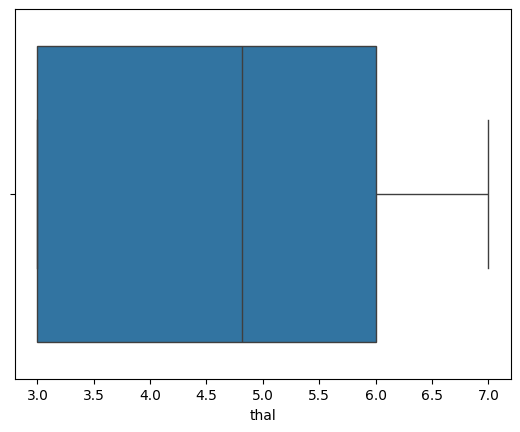

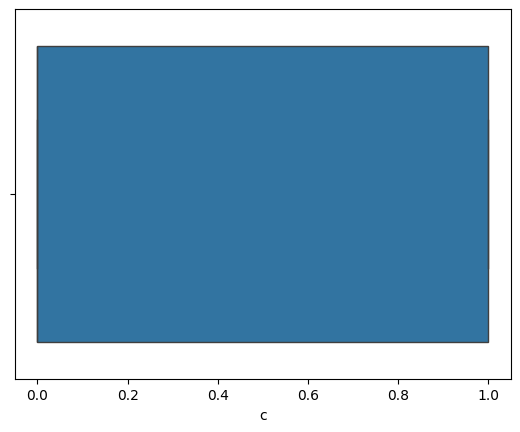

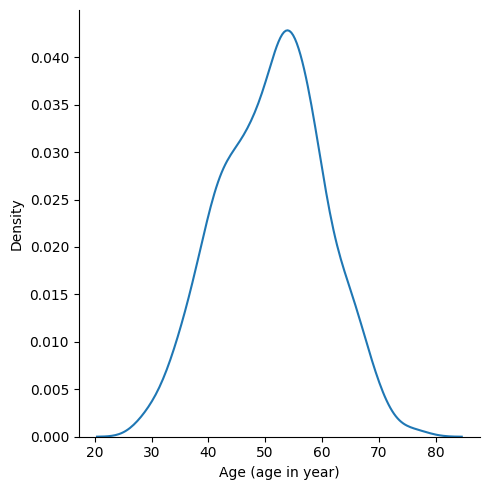

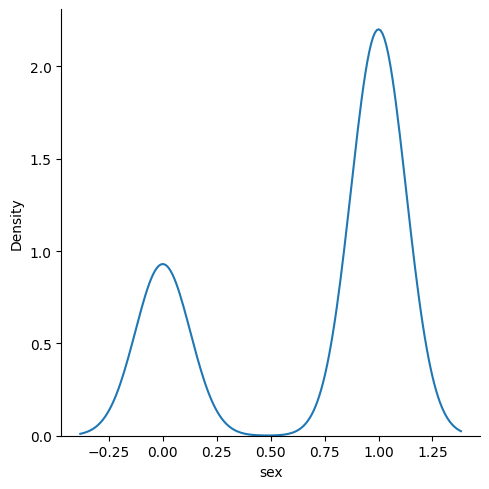

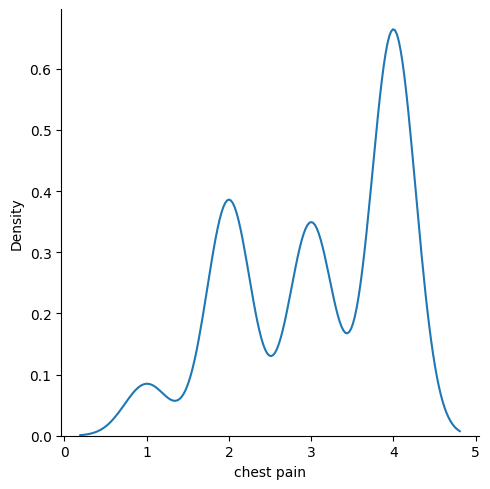

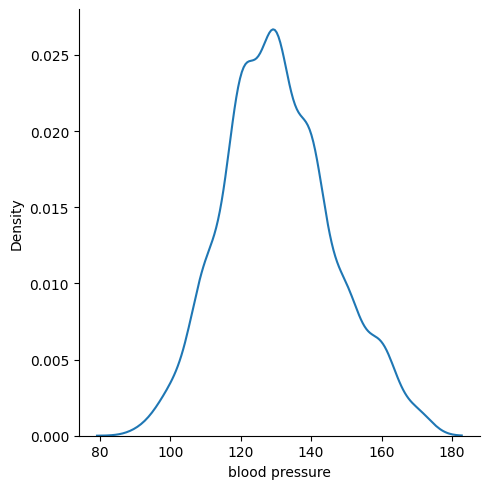

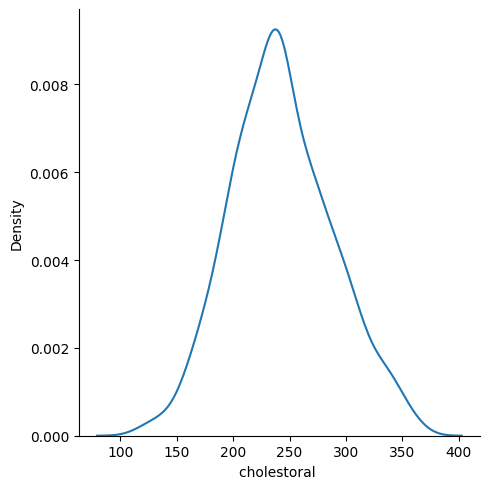

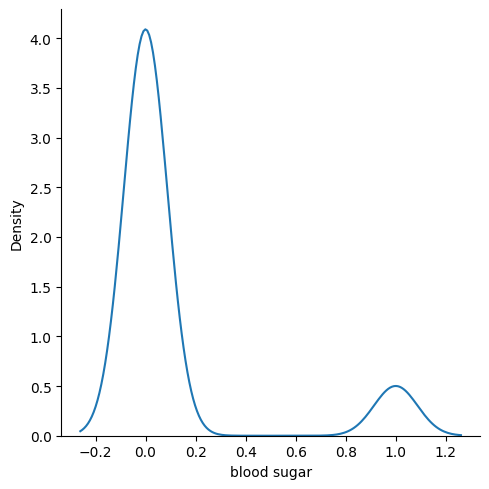

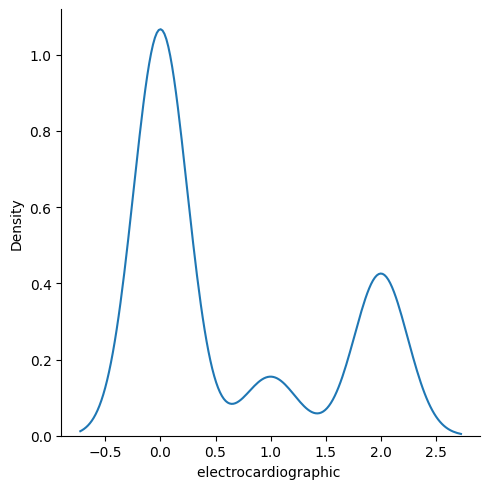

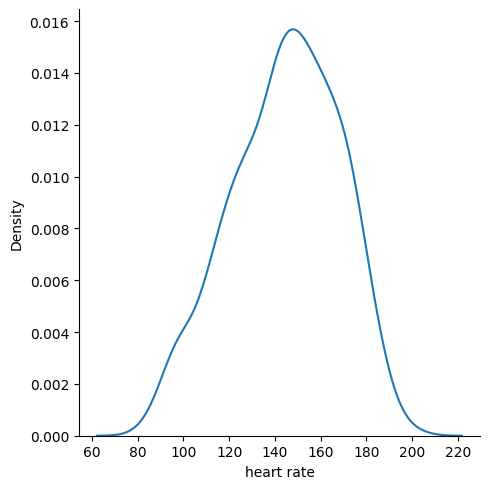

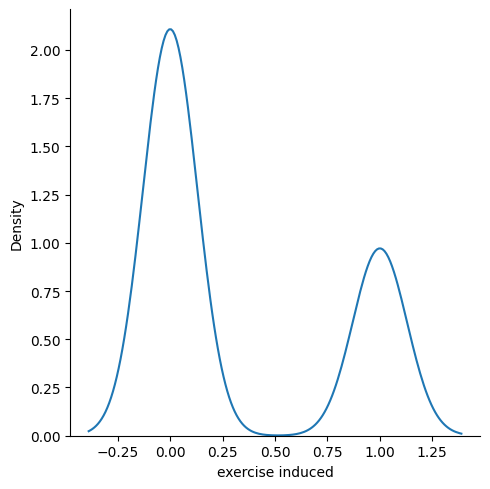

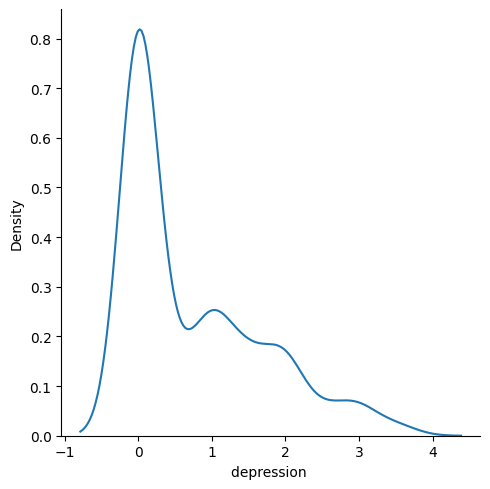

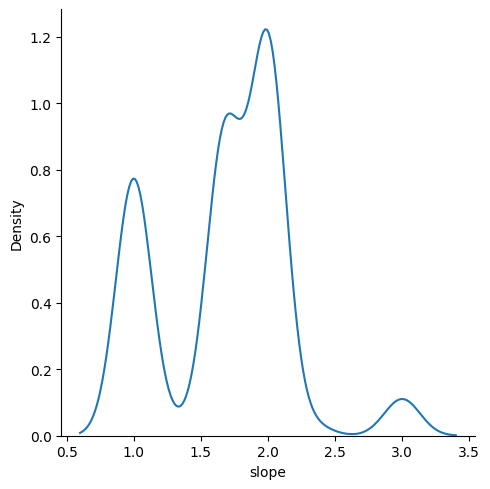

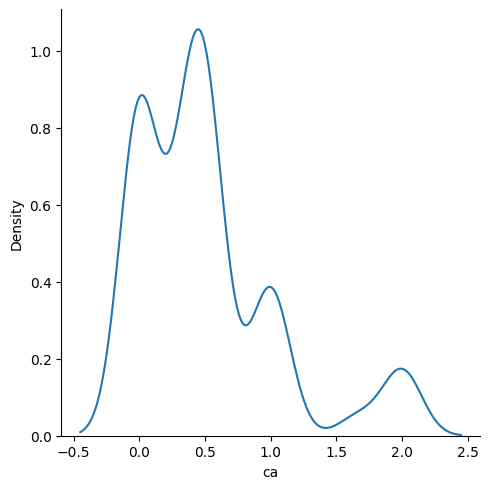

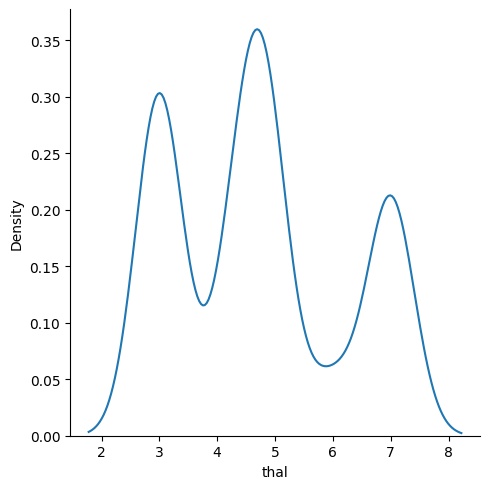

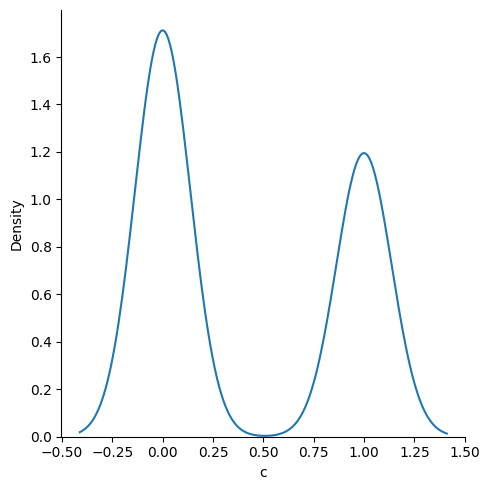

In [15]:
data_feature = heart.columns
for i in data_feature:
    p = sns.boxplot(x = heart[i])
    plt.show()
for i in data_feature:
    if (heart[i].dtypes == int) | (heart[i].dtypes == float):
        p = sns.displot(x = heart[i], kind="kde")

In [16]:
df2 = heart[heart.isnull().sum(axis=1) <=3]
df2.loc[:,"cholestoral "] = df2["cholestoral "].fillna(df2["cholestoral "].mean())
df2.loc[:,"heart rate"] = df2["heart rate"].fillna(df2["heart rate"].mean())
df2.loc[:,"blood pressure"] = df2["blood pressure"].fillna(df2["blood pressure"].mean())
df2.loc[:,"depression "] = df2["depression "].fillna(df2["depression "].mode()[0])
df2.loc[:,"blood sugar"] = df2["blood sugar"].fillna(df2["blood sugar"].mode()[0])
df3 = df2.copy()
df3.loc[:,"slope"] = df3["slope"].fillna(df2["slope"].mode()[0])
df3.loc[:,"thal"] = df3["thal"].fillna(df2["thal"].mode()[0])
df3.loc[:,"ca"] = df3["ca"].fillna(df2["ca"].mode()[0])

In [17]:
x = df3.drop("c", axis=1)
y = df3.c
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(xtrain)
x_test = scaler.transform(xtest)

In [19]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(
    n_estimators=50,
    max_features="sqrt",
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=4
)
random.fit(x_train, ytrain)
pred1 = random.predict(x_test)
print("Accuracy:", (pred1 == ytest).mean())

Accuracy: 0.7919463087248322
